# Predicting Weather with ML

## Read and Explore Data

In [10]:
import pandas as pd

weather = pd.read_csv('madison-weather.csv', index_col='DATE')

In [36]:
# we can view the column names
weather.columns

Index(['STATION', 'NAME', 'ACMH', 'ACSH', 'AWND', 'FMTM', 'PGTM', 'PRCP',
       'PSUN', 'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN', 'TSUN', 'WDF1', 'WDF2',
       'WDF5', 'WDFG', 'WDFM', 'WESD', 'WSF1', 'WSF2', 'WSF5', 'WSFG', 'WSFM',
       'WT01', 'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09',
       'WT10', 'WT11', 'WT13', 'WT14', 'WT15', 'WT16', 'WT17', 'WT18', 'WT19',
       'WT21', 'WT22', 'WV03'],
      dtype='object')

In [15]:
# we can view the data from August 1, 2022 to August 5, 2022 using 'loc' (label-based indexing)
weather.loc['2022-08-01':'2022-08-05']

,STATION,NAME,ACMH,ACSH,AWND,FMTM,PGTM,PRCP,PSUN,SNOW,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WV03
DATE,,,,,,,,,,,,,,,,,,,,,
2022-08-01,USW00014837,"MADISON DANE CO REGIONAL AIRPORT, WI US",NaN,NaN,6.49,NaN,NaN,0.35,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-02,USW00014837,"MADISON DANE CO REGIONAL AIRPORT, WI US",NaN,NaN,10.74,NaN,NaN,0.00,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-03,USW00014837,"MADISON DANE CO REGIONAL AIRPORT, WI US",NaN,NaN,5.59,NaN,NaN,0.53,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-04,USW00014837,"MADISON DANE CO REGIONAL AIRPORT, WI US",NaN,NaN,6.26,NaN,NaN,0.00,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-05,USW00014837,"MADISON DANE CO REGIONAL AIRPORT, WI US",NaN,NaN,4.92,NaN,NaN,0.00,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Preparing Data

Notice that there are many missing values, which are not useful. According to the [documentation](https://www.ncei.noaa.gov/data/daily-summaries/doc/GHCND_documentation.pdf), there are five core values: PRCP (precipitation, inches), SNOW (snowfall, inches), SNWD (snow depth, inches), TMAX (maximum temperature, Fahrenheit), TMIN (minimum temperature, Fahrenheit).

In [19]:
# we can return the percentage of missing values for each column
weather.apply(pd.isnull).sum()/weather.shape[0]

STATION    0.000000
NAME       0.000000
ACMH       0.623449
ACSH       0.623284
AWND       0.533569
FMTM       0.665996
PGTM       0.544527
PRCP       0.000000
PSUN       0.770993
SNOW       0.000891
SNWD       0.002212
TAVG       0.797861
TMAX       0.000000
TMIN       0.000000
TSUN       0.596580
WDF1       0.964418
WDF2       0.681179
WDF5       0.683226
WDFG       0.704383
WDFM       0.718544
WESD       0.725244
WSF1       0.964418
WSF2       0.681179
WSF5       0.683193
WSFG       0.704251
WSFM       0.718544
WT01       0.598891
WT02       0.958641
WT03       0.903552
WT04       0.982473
WT05       0.984684
WT06       0.975079
WT07       0.992969
WT08       0.778354
WT09       0.983826
WT10       0.999868
WT11       0.998713
WT13       0.899261
WT14       0.955440
WT15       0.995214
WT16       0.699927
WT17       0.996864
WT18       0.844501
WT19       0.999670
WT21       0.989173
WT22       0.995643
WV03       0.999604
dtype: float64

### Extract Core Values

In [39]:
# we copy the core values into a smaller dataframe, and we rename the columns to be more suggestive
core_weather = weather[['PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN']].copy()
core_weather.columns = ['precip', 'snowfall', 'snow_depth', 'temp_max', 'temp_min']

In [43]:
core_weather

,precip,snowfall,snow_depth,temp_max,temp_min
DATE,,,,,
1939-10-01,0.00,0.0,0.0,67,33
1939-10-02,0.00,0.0,0.0,70,38
1939-10-03,0.00,0.0,0.0,74,48
1939-10-04,0.00,0.0,0.0,81,51
1939-10-05,0.00,0.0,0.0,70,56
...,...,...,...,...,...
2022-09-06,0.00,0.0,0.0,78,53
2022-09-07,0.00,0.0,0.0,83,53
2022-09-08,0.00,0.0,0.0,82,60


In [44]:
# again, we return the percentage of missing values for each column in our new dataframe
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

precip        0.000000
snowfall      0.000891
snow_depth    0.002212
temp_max      0.000000
temp_min      0.000000
dtype: float64

We still have missing values, but the percentage of missing values for each column is very small. So, we'll keep each column, though we still have to deal with the missing values; however, we only have to worry about snowfall and snow depth.

#### Snowfall

Let's return the rows for which the 'snowfall' column has missing values:

In [46]:
core_weather[pd.isnull(core_weather['snowfall'])]

,precip,snowfall,snow_depth,temp_max,temp_min
DATE,,,,,
1996-05-02,0.00,NaN,0.0,63,31
1996-05-03,0.00,NaN,0.0,56,38
1996-05-04,0.00,NaN,0.0,60,39
1996-05-05,0.00,NaN,NaN,51,42
1996-05-06,0.00,NaN,NaN,54,39
1996-05-09,0.94,NaN,0.0,59,48
1996-05-11,0.00,NaN,NaN,55,36
1996-05-12,0.00,NaN,0.0,55,31
1996-05-13,0.00,NaN,0.0,59,30


When we inspect the instances of missing values for the 'snowfall' column, we find that the missing values are clustered according to month and year, otherwise the missing values are isolated instances. We don't know why these values are missing, but we can return all rows for a specific month and year to observe the surrounding data points. Let's look at May 1996 (which has the most missing values):

In [53]:
core_weather.loc['1996-05-01':'1996-05-31']

,precip,snowfall,snow_depth,temp_max,temp_min
DATE,,,,,
1996-05-01,0.00,0.0,0.0,56,31
1996-05-02,0.00,NaN,0.0,63,31
1996-05-03,0.00,NaN,0.0,56,38
1996-05-04,0.00,NaN,0.0,60,39
1996-05-05,0.00,NaN,NaN,51,42
1996-05-06,0.00,NaN,NaN,54,39
1996-05-07,0.00,0.0,0.0,57,42
1996-05-08,0.01,0.0,0.0,52,43
1996-05-09,0.94,NaN,0.0,59,48


In [74]:
core_weather['snowfall'].value_counts()

0.0     27261
0.1       470
0.2       365
0.3       259
0.4       200
        ...  
12.0        1
9.6         1
12.7        1
8.4         1
6.4         1
Name: snowfall, Length: 98, dtype: int64

Since the surrounding days (and most days) are 0, and since the percentage of missing values is exceedingly low, we replace the missing values with 0.

In [75]:
core_weather['snowfall'] = core_weather['snowfall'].fillna(0)

#### Snow Depth

Now, let's return the rows for which the 'snow_depth' column has missing values:

In [71]:
# now, we return the rows which have missing values in the 'snow_depth' column
core_weather[pd.isnull(core_weather['snow_depth'])]

,precip,snowfall,snow_depth,temp_max,temp_min
DATE,,,,,
1996-05-05,0.00,NaN,NaN,51,42
1996-05-06,0.00,NaN,NaN,54,39
1996-05-11,0.00,NaN,NaN,55,36
1996-05-18,0.00,0.0,NaN,86,70
1996-05-31,0.00,NaN,NaN,73,37
...,...,...,...,...,...
1997-11-27,0.06,0.0,NaN,43,28
1997-11-28,0.00,0.0,NaN,44,30
1997-11-29,0.30,0.0,NaN,41,35


Again, when we inspect the instances of missing values for the 'snow_depth' column, we find that the missing values are clustered according to month and year, otherwise the missing values are isolated instances. In fact, a lot of missing values are from October and November 1997. (Note: there are more missing values for 'snow_depth' than 'snowfall'.) We can return all rows for a specific month and year to observe the surrounding data points. Let's look at October 1997:

In [80]:
core_weather.loc['1997-11-01':'1997-11-30']

,precip,snowfall,snow_depth,temp_max,temp_min
DATE,,,,,
1997-11-01,0.22,0.0,NaN,57,40
1997-11-02,0.02,0.1,NaN,40,33
1997-11-03,0.06,0.3,NaN,41,33
1997-11-04,0.00,0.0,NaN,40,33
1997-11-05,0.25,0.0,NaN,41,35
1997-11-06,0.04,0.0,NaN,42,36
1997-11-07,0.00,0.0,NaN,46,38
1997-11-08,0.00,0.0,NaN,43,39
1997-11-09,0.04,0.0,NaN,42,36


In [77]:
core_weather['snow_depth'].value_counts()

0.0     24180
1.0      1059
2.0       945
3.0       616
4.0       534
5.0       447
6.0       309
7.0       307
8.0       237
9.0       182
10.0      171
11.0      145
12.0      124
1.2       124
14.0      116
3.1       100
5.9        93
13.0       87
3.9        64
5.1        55
17.0       47
7.1        45
15.0       44
7.9        40
16.0       39
9.1        23
18.0       16
9.8        14
28.0        8
24.0        7
23.0        6
27.0        6
26.0        6
19.0        6
31.0        4
25.0        4
20.0        4
14.2        4
21.0        3
11.8        3
22.0        2
29.0        1
32.0        1
16.1        1
Name: snow_depth, dtype: int64

Again, we find the surrounding days (and most days) are 0, and since the percentage of missing values is exceedingly low, we replace the missing values with 0.

In [81]:
core_weather['snow_depth'] = core_weather['snow_depth'].fillna(0)

### Checking Ourselves

In [82]:
# let's re-run some code to confirm there are no longer missing values
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

precip        0.0
snowfall      0.0
snow_depth    0.0
temp_max      0.0
temp_min      0.0
dtype: float64

In [84]:
# let's confirm that the data types we'll use are numeric
core_weather.dtypes

precip        float64
snowfall      float64
snow_depth    float64
temp_max        int64
temp_min        int64
dtype: object

In [87]:
# let's convert the indices (dates) to pandas datetime, which allows for more powerful indexing
print(core_weather.index)

core_weather.index = pd.to_datetime(core_weather.index)
print(core_weather.index)

Index(['1939-10-01', '1939-10-02', '1939-10-03', '1939-10-04', '1939-10-05',
       '1939-10-06', '1939-10-07', '1939-10-08', '1939-10-09', '1939-10-10',
       ...
       '2022-09-01', '2022-09-02', '2022-09-03', '2022-09-04', '2022-09-05',
       '2022-09-06', '2022-09-07', '2022-09-08', '2022-09-09', '2022-09-10'],
      dtype='object', name='DATE', length=30296)
DatetimeIndex(['1939-10-01', '1939-10-02', '1939-10-03', '1939-10-04',
               '1939-10-05', '1939-10-06', '1939-10-07', '1939-10-08',
               '1939-10-09', '1939-10-10',
               ...
               '2022-09-01', '2022-09-02', '2022-09-03', '2022-09-04',
               '2022-09-05', '2022-09-06', '2022-09-07', '2022-09-08',
               '2022-09-09', '2022-09-10'],
              dtype='datetime64[ns]', name='DATE', length=30296, freq=None)


In [88]:
# as a last check, the documentation mentions values of 9999 indicate missing data, so let's return a count for 9999's
core_weather.apply(lambda x: (x==9999).sum())

precip        0
snowfall      0
snow_depth    0
temp_max      0
temp_min      0
dtype: int64

## Analyzing the Data

[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Temperature (F)')]

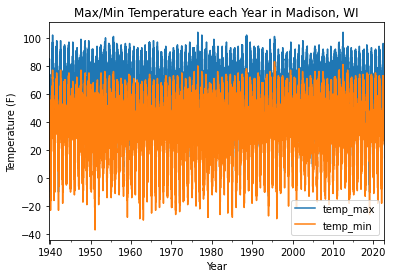

In [177]:
# let's plot the maximum and minimum temperature across time
core_weather[['temp_max', 'temp_min']].plot(title='Max/Min Temperature each Year in Madison, WI')\
    .set(xlabel='Year', ylabel='Temperature (F)')

In [90]:
# we don't notice any large gaps in the data, but we can view the value counts for each year
core_weather.index.year.value_counts().sort_index()

1939     92
1940    366
1941    365
1942    365
1943    365
       ... 
2018    365
2019    365
2020    366
2021    365
2022    253
Name: DATE, Length: 84, dtype: int64

In [139]:
# we can return a series with the sum of snowfall (inches) for each year (note: we drop 1939)
core_weather.groupby(core_weather.index.year).sum()['snowfall'].loc[1940:2022]

DATE
1940    49.5
1941    26.9
1942    29.5
1943    42.9
1944    32.7
        ... 
2018    49.7
2019    66.5
2020    50.9
2021    36.6
2022    24.2
Name: snowfall, Length: 83, dtype: float64

[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Snowfall (inches)')]

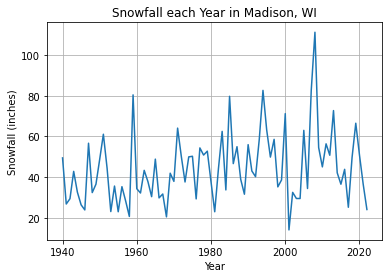

In [140]:
# we can plot the aforementioned series
core_weather.groupby(core_weather.index.year).sum()['snowfall'].loc[1940:2022]\
    .plot(grid=True, title='Snowfall each Year in Madison, WI').set(xlabel='Year', ylabel='Snowfall (inches)')

## Training a Machine Learning Model

Now, we ask the question: What do we want to predict? Well, we could think about precipitation or snowfall, but, for any given date, we'll more likely be interested in temperature, especially in the summer months. Let's focus on the maximum temperature, 'temp_max'.

In [148]:
# we create a new column 'target' which contains the shifted entries of 'temp_max'
core_weather['target'] = core_weather.shift(-1)['temp_max']

In [149]:
# the effect is that, for a given date, the 'target' entry corresponds to tomorrow's maxmimum temperature, 'temp_max'
core_weather

,precip,snowfall,snow_depth,temp_max,temp_min,target
DATE,,,,,,
1939-10-01,0.00,0.0,0.0,67,33,70.0
1939-10-02,0.00,0.0,0.0,70,38,74.0
1939-10-03,0.00,0.0,0.0,74,48,81.0
1939-10-04,0.00,0.0,0.0,81,51,70.0
1939-10-05,0.00,0.0,0.0,70,56,77.0
...,...,...,...,...,...,...
2022-09-06,0.00,0.0,0.0,78,53,83.0
2022-09-07,0.00,0.0,0.0,83,53,82.0
2022-09-08,0.00,0.0,0.0,82,60,82.0


In [150]:
# we ignore the last row containing the missing value we created
core_weather = core_weather.iloc[:-1].copy()
core_weather

,precip,snowfall,snow_depth,temp_max,temp_min,target
DATE,,,,,,
1939-10-01,0.0,0.0,0.0,67,33,70.0
1939-10-02,0.0,0.0,0.0,70,38,74.0
1939-10-03,0.0,0.0,0.0,74,48,81.0
1939-10-04,0.0,0.0,0.0,81,51,70.0
1939-10-05,0.0,0.0,0.0,70,56,77.0
...,...,...,...,...,...,...
2022-09-05,0.0,0.0,0.0,72,54,78.0
2022-09-06,0.0,0.0,0.0,78,53,83.0
2022-09-07,0.0,0.0,0.0,83,53,82.0


### Machine Learning

We will use the 'Ridge' regression model from'scikitlearn'.

In [153]:
from sklearn.linear_model import Ridge

# we initialize the model
reg = Ridge(alpha=.1)

In [166]:
predictors = ['precip', 'snowfall', 'snow_depth', 'temp_max', 'temp_min']

We split our data into a training data set and a test data set, and we'll predict more recent weather data from older data, defining the split to be the end of 2020.

In [167]:
# we define the training set
train = core_weather.loc[:'2020-12-31']

# we define the test set
test = core_weather.loc['2021-01-01':]

In [168]:
# we fit our model
reg.fit(train[predictors], train['target'])

Ridge(alpha=0.1)

In [169]:
# now, we make predictions on our test data set
predictions = reg.predict(test[predictors])

In [170]:
# and we scrutinize our predictions
from sklearn.metrics import mean_absolute_error

In [171]:
mean_absolute_error(test['target'], predictions)

6.042483798575727

We find, on average, we are roughly 6.04 degrees Farenheit from the actual value; of course, this result isn't great.

### Evaluating Our Model

In [174]:
# we print the target (actual) values and the predictions side-by-side
combined = pd.concat([test['target'], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ['actual', 'predictions']
combined

,actual,predictions
DATE,,
2021-01-01,24.0,27.980006
2021-01-02,23.0,27.168681
2021-01-03,29.0,26.763512
2021-01-04,33.0,31.201912
2021-01-05,29.0,34.188354
...,...,...
2022-09-05,78.0,71.913776
2022-09-06,83.0,76.638534
2022-09-07,82.0,80.688270


[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Maximum Temperature (F)')]

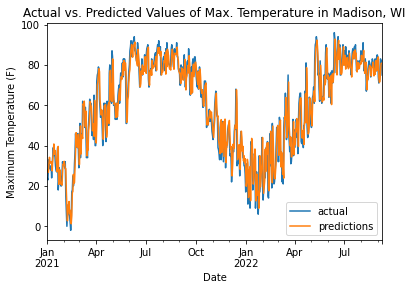

In [179]:
combined.plot(title='Actual vs. Predicted Values of Max. Temperature in Madison, WI')\
    .set(xlabel='Date', ylabel='Maximum Temperature (F)')

In [180]:
# let's see how the predictors are being used in the model
reg.coef_

array([-2.35843911, -1.04412471, -0.12328918,  0.80994731,  0.13492626])

### Prediction Function

In [189]:
def create_predictions(predictors, core_weather, reg):
    train = core_weather.loc[:'2020-12-31']
    test = core_weather.loc['2021-01-01':]
    reg.fit(train[predictors], train['target'])
    predictions = reg.predict(test[predictors])
    error = mean_absolute_error(test['target'], predictions)
    combined = pd.concat([test['target'], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ['actual', 'predictions']
    return error, combined

### Rolling Mean and New Predictors

In [182]:
# let's find the rolling mean every 30 days for 'temp_max'
core_weather['month_max'] = core_weather['temp_max'].rolling(30).max()
core_weather

,precip,snowfall,snow_depth,temp_max,temp_min,target,month_max
DATE,,,,,,,
1939-10-01,0.0,0.0,0.0,67,33,70.0,NaN
1939-10-02,0.0,0.0,0.0,70,38,74.0,NaN
1939-10-03,0.0,0.0,0.0,74,48,81.0,NaN
1939-10-04,0.0,0.0,0.0,81,51,70.0,NaN
1939-10-05,0.0,0.0,0.0,70,56,77.0,NaN
...,...,...,...,...,...,...,...
2022-09-05,0.0,0.0,0.0,72,54,78.0,85.0
2022-09-06,0.0,0.0,0.0,78,53,83.0,85.0
2022-09-07,0.0,0.0,0.0,83,53,82.0,85.0


In [195]:
# we can determine how different the mothly average temperature is from the day's temperature
core_weather['month_day_max'] = core_weather['month_max'] - core_weather['temp_max']

In [196]:
# we can determine the range between maximum and minimum temperature
core_weather['max_min'] = core_weather['temp_max'] - core_weather['temp_min']

In [186]:
# let's add our new columns as predictors
predictors = ['precip', 'snowfall', 'snow_depth', 'temp_max', 'temp_min', 'month_max', 'month_day_max', 'max_min']

In [ ]:
# we need to deal with the missing values again; here, we'll delete the rows containing missing values
core_weather = core_weather.iloc[30:].copy()

In [197]:
core_weather

,precip,snowfall,snow_depth,temp_max,temp_min,target,month_max,month_day_max,max_min
DATE,,,,,,,,,
1939-10-31,0.0,0.0,0.0,48,31,40.0,85.0,37.0,17
1939-11-01,0.0,0.0,0.0,40,29,40.0,85.0,45.0,11
1939-11-02,0.0,0.0,0.0,40,27,44.0,85.0,45.0,13
1939-11-03,0.0,0.0,0.0,44,23,48.0,85.0,41.0,21
1939-11-04,0.0,0.0,0.0,48,28,46.0,85.0,37.0,20
...,...,...,...,...,...,...,...,...,...
2022-09-05,0.0,0.0,0.0,72,54,78.0,85.0,13.0,18
2022-09-06,0.0,0.0,0.0,78,53,83.0,85.0,7.0,25
2022-09-07,0.0,0.0,0.0,83,53,82.0,85.0,2.0,30


In [198]:
# call our previously defined function
error, combined = create_predictions(predictors, core_weather, reg)

In [199]:
# we reduce our error slightly
error

5.967879900130934

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Maximum Temperature (F)')]

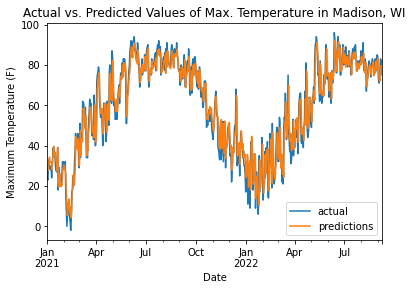

In [202]:
combined.plot(title='Actual vs. Predicted Values of Max. Temperature in Madison, WI')\
    .set(xlabel='Date', ylabel='Maximum Temperature (F)')

In [203]:
combined

,actual,predictions
DATE,,
2021-01-01,24.0,28.716511
2021-01-02,23.0,28.051108
2021-01-03,29.0,27.636773
2021-01-04,33.0,31.281952
2021-01-05,29.0,34.280048
...,...,...
2022-09-05,78.0,71.871311
2022-09-06,83.0,76.057270
2022-09-07,82.0,79.628900


### More Predictors

In [204]:
# we create a monthly average, being careful not to use more recent data to calculate older averages
core_weather['monthly_avg'] = core_weather['temp_max'].groupby(core_weather.index.month)\
    .apply(lambda x: x.expanding(1).mean())

In [206]:
# similarly, we create a daily average
core_weather['day_of_year_avg'] = core_weather['temp_max'].groupby(core_weather.index.day_of_year)\
    .apply(lambda x: x.expanding(1).mean())

In [207]:
core_weather

,precip,snowfall,snow_depth,temp_max,temp_min,target,month_max,month_day_max,max_min,monthly_avg,day_of_year_avg
DATE,,,,,,,,,,,
1939-10-31,0.0,0.0,0.0,48,31,40.0,85.0,37.0,17,48.000000,48.000000
1939-11-01,0.0,0.0,0.0,40,29,40.0,85.0,45.0,11,40.000000,40.000000
1939-11-02,0.0,0.0,0.0,40,27,44.0,85.0,45.0,13,40.000000,40.000000
1939-11-03,0.0,0.0,0.0,44,23,48.0,85.0,41.0,21,41.333333,44.000000
1939-11-04,0.0,0.0,0.0,48,28,46.0,85.0,37.0,20,43.000000,48.000000
...,...,...,...,...,...,...,...,...,...,...,...
2022-09-05,0.0,0.0,0.0,72,54,78.0,85.0,13.0,18,72.663286,77.506024
2022-09-06,0.0,0.0,0.0,78,53,83.0,85.0,7.0,25,72.665450,78.253012
2022-09-07,0.0,0.0,0.0,83,53,82.0,85.0,2.0,30,72.669639,76.891566


In [208]:
# run the previously define function
predictors = ['precip', 'snowfall', 'snow_depth', 'temp_max', 'temp_min', 'month_max', 'month_day_max', 'max_min',\
             'monthly_avg', 'day_of_year_avg']

error, combined = create_predictions(predictors, core_weather, reg)

In [209]:
# we further reduce our error
error

5.664913922849373

### Model Diagnostics

In [210]:
# see how the predictors are being used in the model
reg.coef_

array([-2.43004159, -0.91615688, -0.12344935,  0.3174611 ,  0.18783492,
        0.15277721, -0.16468398,  0.12962624,  0.11979533,  0.21604161])

In [211]:
# most of the predictors are highly correlated with the target (actual) values
core_weather.corr()['target']

precip             0.080390
snowfall          -0.250390
snow_depth        -0.489770
temp_max           0.934344
temp_min           0.883779
target             1.000000
month_max          0.844996
month_day_max     -0.482590
max_min            0.383295
monthly_avg        0.887381
day_of_year_avg    0.899946
Name: target, dtype: float64

In [212]:
# we can see the difference between the actual and predicted values, and return the highest differences
combined['diff'] = (combined['actual'] - combined['predictions']).abs()

In [213]:
combined.sort_values('diff', ascending=False).head()

,actual,predictions,diff
DATE,,,
2022-04-22,81.0,53.304888,27.695112
2022-02-19,51.0,23.706251,27.293749
2021-04-30,87.0,61.653394,25.346606
2021-12-14,68.0,42.916475,25.083525
2021-05-26,51.0,74.563033,23.563033
